# Worksheet 15

Name:  Zhupei Xu
UID: U83632486

### Topics

- Support Vector Machines

## Support Vector Machines

a) Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

In [8]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from PIL import Image
TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

# Dataset
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

# Initializing w and b
w = np.array([1, 1])
b = 0.1

# Perceptron Parameters
epochs = 100
alpha = .05
expanding_rate = .99
retracting_rate = 1.1

def snap(x, w, b, error):
    """
        Plot the street induced by w and b.
        Circle the point x in red if it was
        misclassified or in yellow if it was
        classified correctly.
    """

    xplot = np.linspace(-3, 3, 100)
    yplot = (-w[0]*xplot - b) / w[1]  # Equation of the decision boundary
    margin = 1 / np.linalg.norm(w)  # Margin for the support vectors

    # Calculating the margins for the support vectors
    left_svm = yplot - margin * w[1]
    right_svm = yplot + margin * w[1]

    # Plot the data, decision boundary and margins
    fig, ax = plt.subplots()
    cs = np.array(['b' if label == -1 else 'g' for label in Y])  # Color scheme
    ax.scatter(X[:,0], X[:,1], color=cs, s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), 0.2, color='r', fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), 0.2, color='y', fill=False))
    ax.plot(xplot, left_svm, 'g--', lw=2)
    ax.plot(xplot, yplot, 'r-', lw=2)
    ax.plot(xplot, right_svm, 'b--', lw=2)
    ax.set_xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    ax.set_ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    fig.savefig(TEMPFILE)
    plt.close()
   
    # Directly convert the plot to an image, without saving to TEMPFILE
    fig.canvas.draw()  # Draw the canvas to cache the renderer
    width, height = fig.get_size_inches() * fig.get_dpi()
    mpl_image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)

    plt.close(fig)  # Close the figure to free memory

    # Convert the NumPy array to a PIL Image and return it
    return Image.fromarray(mpl_image)



images = []
for _ in range(epochs):
    # Shuffle the dataset at the beginning of each epoch
    permutation = np.random.permutation(len(X))
    X, Y = X[permutation], Y[permutation]
    
    for i in range(len(X)):
        x, y = X[i], Y[i]

        # Check if the sample x is correctly classified
        if y * (np.dot(w, x) + b) <= 0:
            error = True
            # Update the weights and bias
            w = w + alpha * y * x
            # Update the bias term
            b = b + alpha * y
        else:
            error = False
        
        # Take a snapshot for the current state
        images.append(snap(x, w, b, error))
images[0].save(
    'svm.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

b) Consider the following dataset:

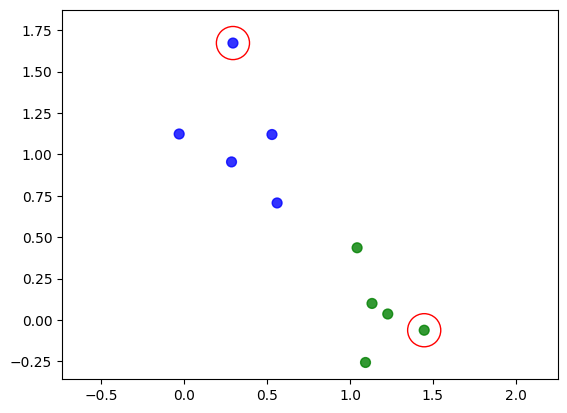

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

If the red-circled points are moved closer to the center of their respective clusters, they might become less critical as support vectors if they are no longer the closest points to the other cluster.
If the points are moved closer to the other cluster, they could become more critical as support vectors.
If the points are moved parallel to the decision boundary, they could remain support vectors, and the boundary would not change significantly unless the points cross over to the other side of the boundary.
If a point is moved across the decision boundary, it will definitely affect the SVM fit.

c) If we were to fit an SVM to the above dataset, which points do you think would affect the decision boundary the most? Circle them in red.

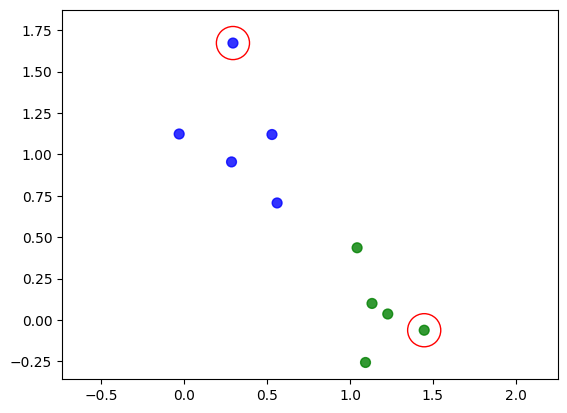

In [ ]:

# Calculate the distance of each point to the decision boundary line x0 = x1
distances = np.abs(X[:, 0] - X[:, 1]) / np.sqrt(2)

# Sort the distances and pick the closest points
sorted_indices = np.argsort(distances)

# Assuming we have 2 support vectors from each class (1 and 0)
# We will pick 1 point from each class that are closest to the decision boundary
support_vectors_indices = []
for label in [0, 1]:
    # Find indices where the label matches
    label_indices = np.where(Y == label)[0]
    # Intersect with sorted indices to maintain distance ordering
    sorted_label_indices = np.intersect1d(sorted_indices, label_indices, assume_unique=True)
    # Append the index of the closest point of this label to the support vectors
    support_vectors_indices.append(sorted_label_indices[0])

# Now we can plot the points and circle the identified support vectors in red
cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')

# Draw circles around the support vectors
for index in support_vectors_indices:
    ax.add_patch(plt.Circle((X[index][0], X[index][1]), .1, color='r', fill=False))

plt.show()
